In [1]:
import numpy as np
import sep

In [2]:
from astropy.io import fits  # Astropy's fits module replaces fitsio
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [3]:
fits_file_f105w = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
with fits.open(fits_file_f105w) as hdul:
    data_f105w = hdul[0].data.astype(np.float32)  # Read the data as array

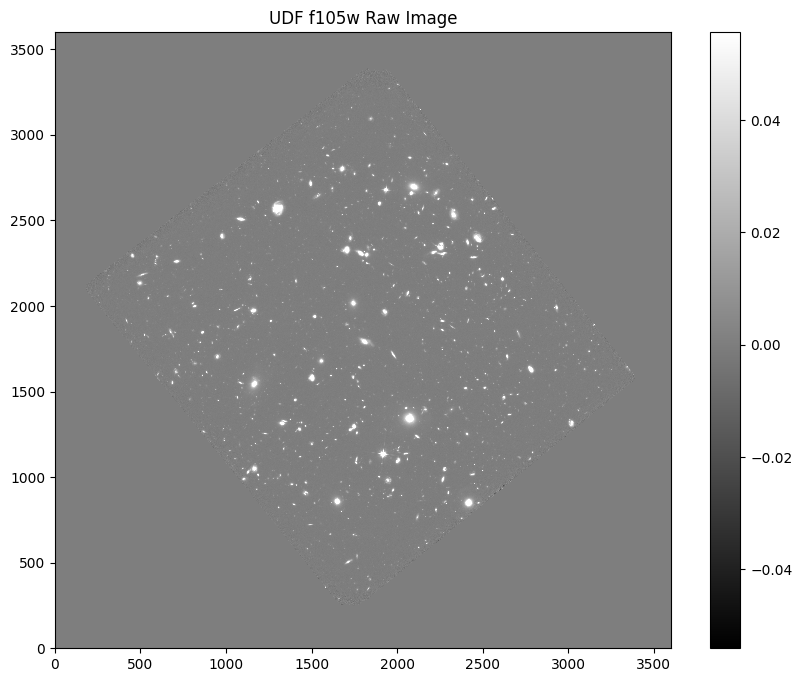

In [4]:
# show the image
m_udf, s_udf = np.mean(data_f105w), np.std(data_f105w)
plt.imshow(data_f105w, interpolation='nearest', cmap='gray', vmin=m_udf-s_udf, vmax=m_udf+s_udf, origin='lower')
plt.colorbar()
plt.title("UDF f105w Raw Image")
plt.savefig("udf_raw_image.png")  # Save the figure as a PNG
plt.show()

In [5]:
# measure a spatially varying background on the image
bkg = sep.Background(data_f105w)

In [6]:
# get a "global" mean and noise of the image background:
print("UDF Global Background:", bkg.globalback)
print("UDF Global RMS:", bkg.globalrms)

UDF Global Background: 0.0
UDF Global RMS: 0.0005398219218477607


In [7]:
bkg_image_udf = bkg.back()

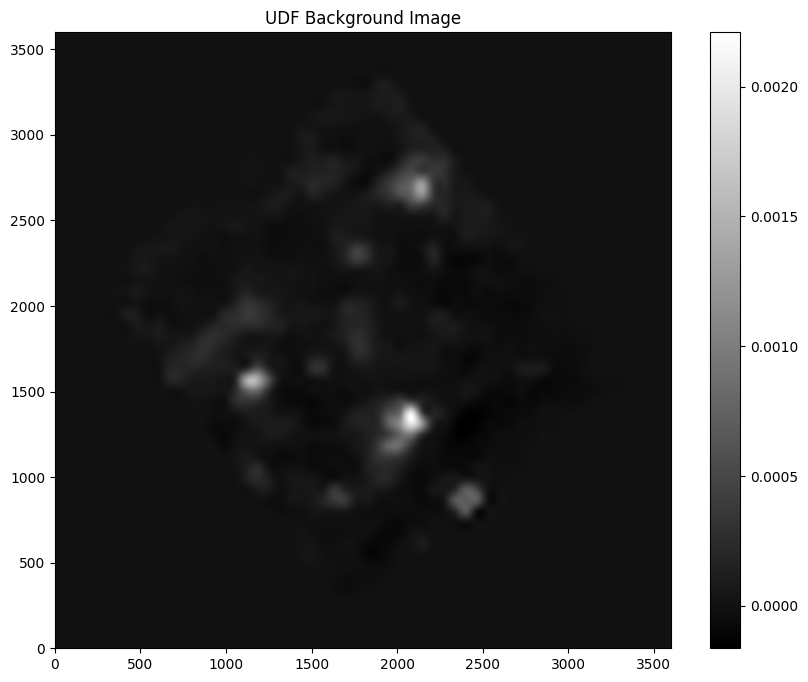

In [8]:
plt.imshow(bkg_image_udf, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("UDF Background Image")
plt.savefig("udf_background_image.png")  # Save the figure as a PNG
plt.show()

In [9]:
bkg_rms_udf = bkg.rms()

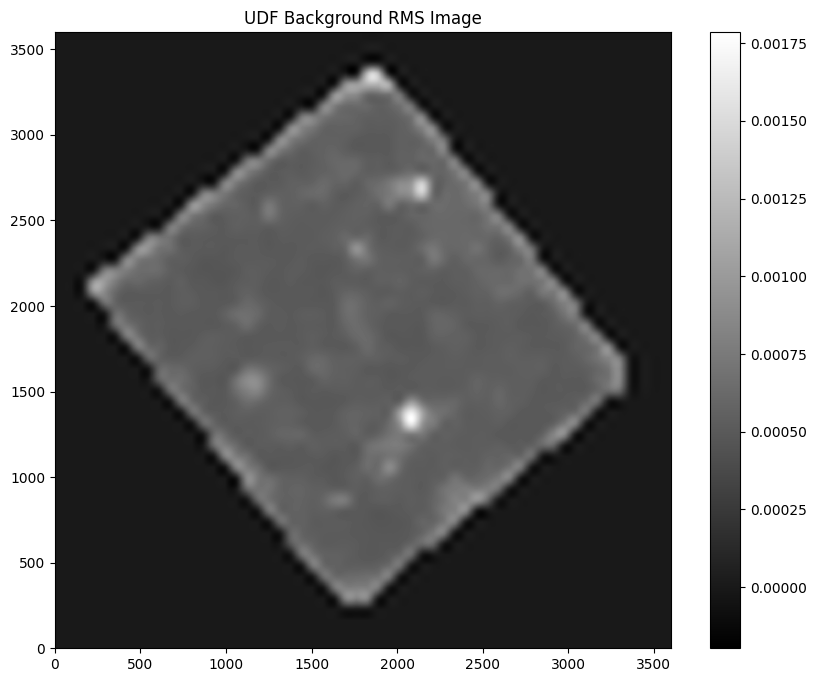

In [10]:
plt.imshow(bkg_rms_udf, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("UDF Background RMS Image")
plt.savefig("udf_background_image.png") 
plt.show()

In [11]:
data_sub = data_f105w - bkg

In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [13]:
flux = np.array([obj['flux'] for obj in objects])
flux_mean = np.mean(flux)
flux_median = np.median(flux)
flux_std = np.std(flux)

print(f"Flux Mean: {flux_mean:.2f}")
print(f"Flux Median: {flux_median:.2f}")
print(f"Flux Standard Deviation: {flux_std:.2f}")

Flux Mean: 1.17
Flux Median: 0.03
Flux Standard Deviation: 17.54


In [14]:
outlier_flux = flux[flux > flux_mean + 5 * flux_std]
outlier_index = np.argmax(outlier_flux)
outlier_x, outlier_y = objects[outlier_index]['x'], objects[outlier_index]['y']
std_dev_from_mean = (outlier_flux - flux_mean) / flux_std

print(f"Largest Outlier Flux: {outlier_flux[0]:.2f}")
print(f"Location of Outlier: (x, y) = ({outlier_x}, {outlier_y})")
print(f"Outlier is {std_dev_from_mean[0]:.2f} standard deviations away from the mean.")

Largest Outlier Flux: 260.68
Location of Outlier: (x, y) = (1765.6975440364592, 252.50539982525007)
Outlier is 14.79 standard deviations away from the mean.


In [15]:
fits_file_f125w = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fits_file_f160w = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

with fits.open(fits_file_f125w) as hdul_f125w:
    data_f125w = hdul_f125w[0].data.astype(np.float32)

with fits.open(fits_file_f160w) as hdul_f160w:
    data_f160w = hdul_f160w[0].data.astype(np.float32)

data_f105w_norm = (data_f105w - np.min(data_f105w)) / (np.max(data_f105w) - np.min(data_f105w))
data_f125w_norm = (data_f125w - np.min(data_f125w)) / (np.max(data_f125w) - np.min(data_f125w))
data_f160w_norm = (data_f160w - np.min(data_f160w)) / (np.max(data_f160w) - np.min(data_f160w))

# Optionally clip values to ensure they lie within the 0-1 range
data_f105w_norm = np.clip(data_f105w_norm, 0, 1)
data_f125w_norm = np.clip(data_f125w_norm, 0, 1)
data_f160w_norm = np.clip(data_f160w_norm, 0, 1)

rgb_image = np.stack([data_f160w_norm, data_f125w_norm, data_f105w_norm], axis=-1)

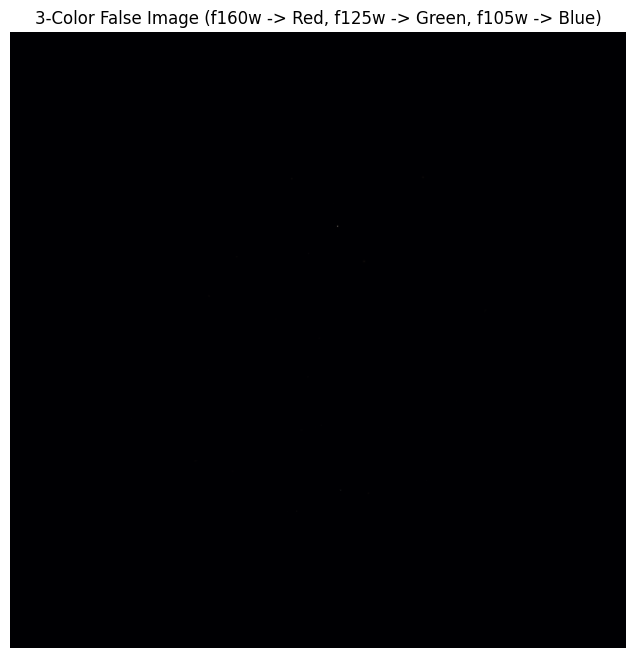

In [16]:
plt.imshow(rgb_image)
plt.title("3-Color False Image (f160w -> Red, f125w -> Green, f105w -> Blue)")
plt.axis('off')
plt.savefig("udf_3color_false_image.png")  # Save as PNG
plt.show()